### TAREA 17 


__Ejercicio 2:__ ¿Como se define una matriz simétrica?

 $A$ es simétrica si y solo si $$A=A^{T}$$ 
 donde $A^{T}$ es la matriz transpuesta

__Ejercicio 3:__ ¿Como puede construir una matriz simétrica a partir de cualquier matriz cuadrada?

$A^{s}$ es simetrica cuando la definimos de la siguiente manera 
$$A^{s}=\frac{1}{2}[A^{T}+A]$$
Dada A una matriz cuadrada.

__Ejercicio 4:__ Construya el propagador $e^{A t}$ para cada tiempo sobre una malla y uselo para propagar un estado inicial $\vec x_0$ cualquiera. Utilice:
$$A=\left(\begin{array}{cc} 1 & 1\\ -1 & 1 \end{array} \right).$$
* Grafique la trayectoria en el espacio de fase.

In [4]:
A=[1 1; -1 1]; #definimos la matriz propuesta

In [5]:
@show A

A = [1 1; -1 1]


2×2 Array{Int64,2}:
  1  1
 -1  1

In [6]:
vals=eigvals(A); #calcuamos los valores propios

2-element Array{Complex{Float64},1}:
 1.0+1.0im
 1.0-1.0im

In [7]:
w=eigvecs(A) #los vectores propios 

2×2 Array{Complex{Float64},2}:
 0.707107+0.0im       0.707107-0.0im     
      0.0+0.707107im       0.0-0.707107im

In [8]:
d=diagm(vals)  

2×2 Array{Complex{Float64},2}:
 1.0+1.0im  0.0+0.0im
 0.0+0.0im  1.0-1.0im

In [9]:
w*d*inv(w) #comprobamos que nos devuelve la matriz A, es decir. A y d son similares.

2×2 Array{Complex{Float64},2}:
  1.0+0.0im  1.0+0.0im
 -1.0+0.0im  1.0+0.0im

In [27]:
n(t,x0)=w*diagm(exp.(vals*t))*inv(w)*x0 #creamos una función para multiplicar por distintas condiciones inciales 

n (generic function with 1 method)

In [26]:
t1 =linspace(0,10,100); #intevalo de tiempo 

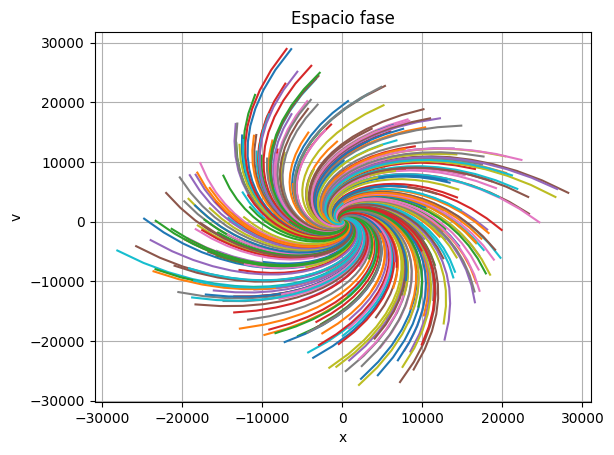

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


In [29]:
using PyPlot

for i in 1:300     #ciclo for para crear muchas condiciones iniciales 
    C = []
    D = [2*rand()-1; 2*rand()-1]
 
    for k in 1:length(t1)
        E = n(t1[k], D)
        push!(C,E)
    end

    listx=map(x->x[1],real(C)) #posición  
    listv=map(x->x[2],real(C)) #velocidad
    plot(listx,listv)
    legend()
 xlabel("x")
    ylabel("v")
    title("Espacio fase")
    grid("on")
show(); 
end